In [1]:
import matplotlib.pyplot as plt
import mpl_lego as mplego
import numpy as np
import pandas as pd

from functools import partial
from mpl_lego.labels import bold_text
from scipy.stats import bootstrap
 
%matplotlib inline

In [2]:
mplego.style.use_latex_style()

In [3]:
df = pd.read_csv('../data/aita_final.csv')

In [4]:
labels = ['NTA', 'YTA', 'NAH', 'ESH', 'INFO']
n_labels = len(labels)

In [5]:
# Calculate bootstrap estimates
def categorical_proportion(data, category):
    return np.mean(data == category)

In [6]:
observed_bounds = [
    bootstrap((df['true_label'].values,), partial(categorical_proportion, category=label))
    for label in labels]

In [7]:
gpt_bounds = [
    bootstrap((df['gpt_label_1'].values,), partial(categorical_proportion, category=label))
    for label in labels]

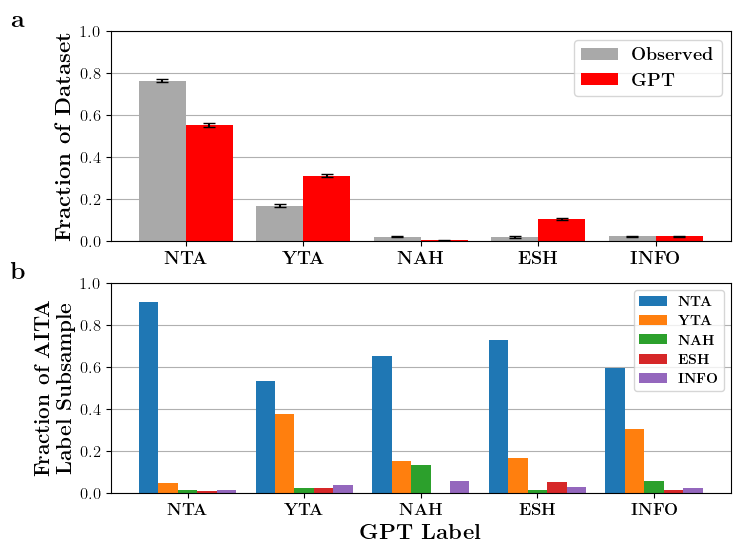

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

observed_counts = df['true_label'].value_counts(normalize=True)
gpt_counts = df['gpt_label_1'].value_counts(normalize=True)

width = 0.4

axes[0].bar(
    x=np.arange(n_labels) - width / 2,
    height=[observed_counts[label] for label in labels],
    width=width,
    yerr=[[observed_bounds[ii].confidence_interval.high - observed_counts[labels[ii]]
          for ii in range(n_labels)],
         [observed_counts[labels[ii]] - observed_bounds[ii].confidence_interval.low
          for ii in range(n_labels)]],
    error_kw={'capsize': 4},
    color='darkgrey',
    label=bold_text('Observed'))
axes[0].bar(
    x=np.arange(n_labels) + width / 2,
    height=[gpt_counts[label] for label in labels],
    width=width,
    yerr=[[gpt_bounds[ii].confidence_interval.high - gpt_counts[labels[ii]]
          for ii in range(n_labels)],
         [gpt_counts[labels[ii]] - gpt_bounds[ii].confidence_interval.low
          for ii in range(n_labels)]],
    error_kw={'capsize': 4},
    color='red',
    label=bold_text('GPT'))

axes[0].set_ylim([0, 1])
axes[0].legend(loc=0, prop={'size': 13})
axes[0].set_xticks(np.arange(n_labels))
axes[0].set_xticklabels(['NTA', 'YTA', 'NAH', 'ESH', 'INFO'], fontsize=13)
axes[0].tick_params(labelsize=12, axis='y')

axes[0].grid(axis='y')
axes[0].set_axisbelow(True)
mplego.labels.bold_axis_ticklabels(ax=axes[0], which='x')
axes[0].set_ylabel(bold_text('Fraction of Dataset'), fontsize=16)

"""
Figure 1b
"""

for ii, label in enumerate(labels):
    counts = df[df['gpt_label_1'] == label]['true_label'].value_counts(normalize=True)
    for label in labels:
        if label not in counts.index:
            counts[label] = 0
    axes[1].bar(x=6*ii + np.arange(n_labels),
           width=1,
           height=counts[labels],
           color=['C0', 'C1', 'C2', 'C3', 'C4'])

axes[1].bar(x=[0, 1, 2, 3, 4],
        height=[0, 0, 0, 0, 0],
        color=['C0', 'C1', 'C2', 'C3', 'C4'],
        label=bold_text(labels))
axes[1].set_xticks([2, 8, 14, 20, 26])
axes[1].set_xticklabels(labels)
axes[1].set_ylim([0, 1])
axes[1].grid(axis='y')
axes[1].set_axisbelow(True)
mplego.labels.bold_axis_ticklabels(ax=axes[1], which='x')

axes[1].set_ylabel(bold_text('Fraction of AITA\nLabel Subsample'), fontsize=15)
axes[1].tick_params(labelsize=12, axis='x')

axes[1].tick_params(labelsize=12, axis='y')

axes[1].set_xlabel(bold_text('GPT Label'), fontsize=16)
axes[1].legend(loc=0, prop={'size': 10})

mplego.labels.apply_subplot_labels(axes, bold=True, size=18)
plt.savefig('figure1.pdf', bbox_inches='tight')